In [16]:
# some pakages to use
%matplotlib inline
# -*-coding:utf-8 -*-

import matplotlib
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import time
import cvxpy as cvx
import scipy
from sklearn.datasets import fetch_mldata
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['axes.labelsize']=20 #用来正常显示负号
plt.rcParams['axes.titlesize']=20 #用来正常显示负号
matplotlib.rcParams['figure.subplot.bottom'] = 0.1
matplotlib.rcParams['figure.subplot.top'] = 0.95
matplotlib.rcParams['figure.subplot.right'] = 0.95
matplotlib.rcParams['figure.subplot.left'] = 0.1
# matplotlib.rcParams['figure.subplot.right'] = 0.95
# matplotlib.rcParams['figure.subplot.left'] = 0.1
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['xtick.labelsize'] = 15

# plt.rcParams['text.usetex']=True #用来正常显示负号
matplotlib.rcParams['figure.figsize'] = (8,8)
font = {'family' : 'SimHei',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 20}  

colors_ = np.array(colors.cnames.keys())

# plt.rcParams.keys()

In [3]:
def frwe_cvx(x, P, alpha=0.1, delta=1e-5, max_times=1000):
    dim = P.shape[0]
    w = cvx.Variable(dim)
    res = cvx.norm(x-cvx.vec(w).T*P)
    entropy = cvx.sum_entries(-cvx.entr(w))
    obj = res + alpha*entropy
    constraints = [0 <= w, cvx.sum_entries(w)==1]
    prob = cvx.Problem(cvx.Minimize(obj), constraints)
    try:
        prob.solve(verbose=False, solver=cvx.ECOS)
    except:
        prob.solve(verbose=False, solver=cvx.SCS)
    return prob

In [4]:
dataset = fetch_mldata('MNIST original')
P=np.array([np.average(dataset.data[0:60000,:][dataset.target[0:60000]==tem,:],0) for tem in range(0,len(set(dataset.target)))])/255
X = dataset.data/255
classes = len(set(dataset.target))
dimensions = X.shape[1]
samples = X.shape[0] 
test_size = 10000

In [5]:
set(dataset.target)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

In [6]:
problist=[]
now = time.time()
x = dataset.data[60001,:]/255.0
for temp in np.linspace(0,99,100):
    problist.append(frwe_cvx(x.reshape(1,784),P,alpha=temp))
print time.time()-now

1.72200012207


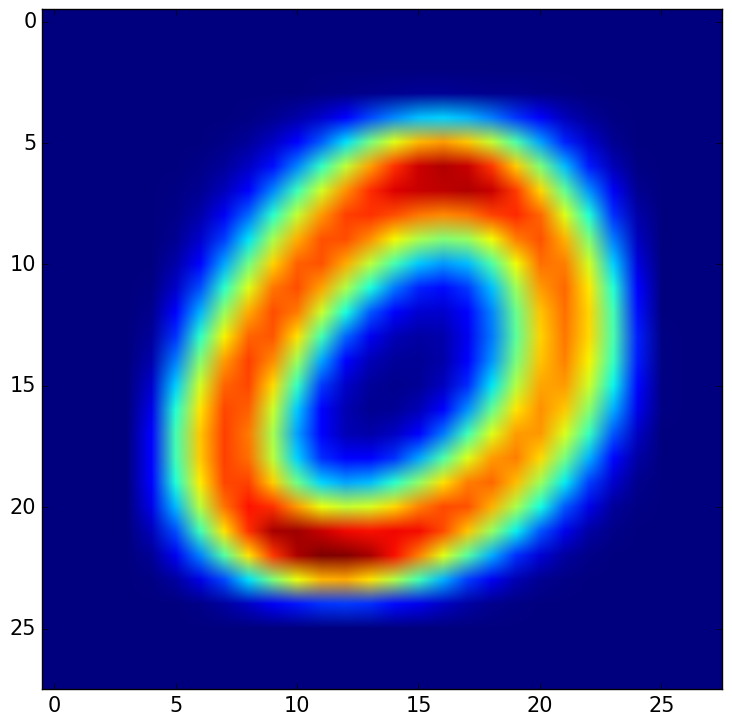

In [35]:
plt.imshow(P[0].reshape(28,28))

In [7]:
problist=[]
now = time.time()
x = dataset.data[60000,:]/255.0
print dataset.target[60000]
# plt.imshow(dataset.data[60007,:].reshape(28,28),cmap="gray")
_lambda = np.logspace(-1,1,100)
for temp in _lambda:
    problist.append(frwe_cvx(x.reshape(1,784),P,alpha=temp))
print time.time()-now

res = [tem.value for tem in problist]
resultw = np.array([tem.variables()[0].value.tolist() for tem in problist]).reshape(100,10)
s=[]

0.0
1.79000020027


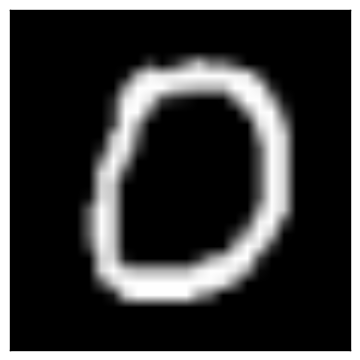

In [72]:
axes = plt.subplot(111)
axes.set_xticks([])
axes.set_yticks([])
axes.imshow(x.reshape(28,28),cmap="gray")


[  6.15071274  10.38126122   8.56905175   8.67949764   9.0427023
   8.08160151   7.73529979   8.66736282   8.71128611   8.66929781]


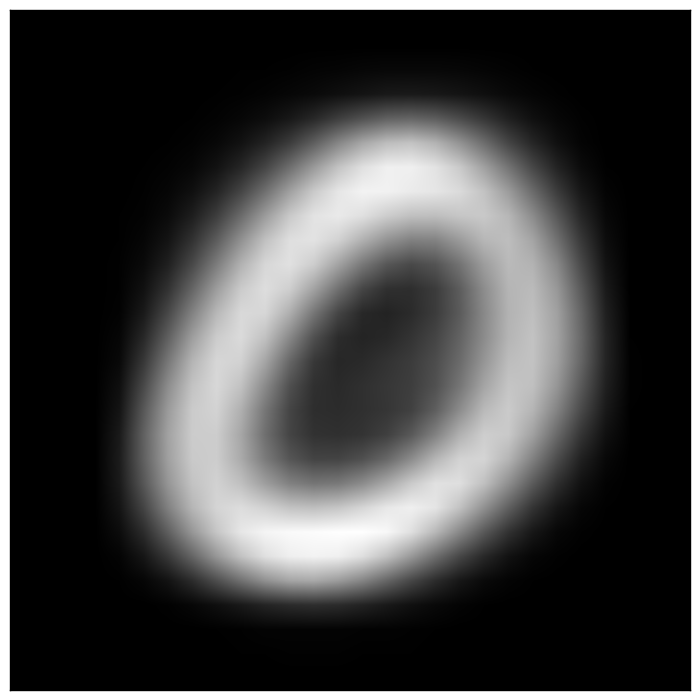

In [8]:
tempw = frwe_cvx(x.reshape(1,784),P,alpha=0.2).variables()[0].value.tolist()
axes = plt.subplot(111)
axes.set_xticks([])
axes.set_yticks([])
axes.imshow(np.array(tempw).T.dot(P).reshape(28,28),cmap="gray")
# plt.imshow(resultw[1,:].dot(P).reshape(28,28),cmap="gray")
print np.linalg.norm(P-np.tile(x,(10,1)),axis=1)

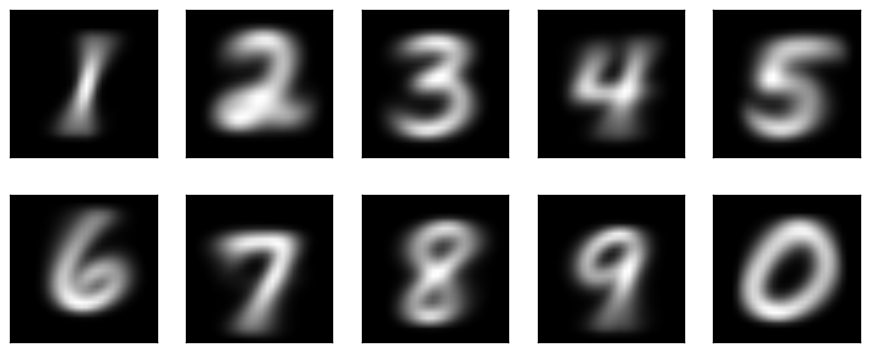

In [9]:
matplotlib.rcParams['figure.figsize'] = (10,4)
for i in range(0,10):
    axes = plt.subplot("25%d"%i)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.imshow(P[i].reshape(28,28),cmap="gray")


In [12]:
order = np.argsort(resultw,axis=1)
np.sum(np.abs(resultw[order,order]-np.sort(resultw,axis=1)))
# print np.sort(resultw,axis=1)[1,:]
wb=np.zeros(resultw.shape)
for i in range(0,9):
    wb[:,i]=(i+1)*(-np.sort(-resultw,axis=1)[:,i]+np.sort(-resultw,axis=1)[:,i+1])
wb[:,9]=10*-np.sort(-resultw,axis=1)[:,9]
mu=np.zeros(resultw.shape)
orderw = -np.sort(-resultw,axis=1)
for i in range(0,9):
    mu[:,i]=i*orderw[:,i]+np.sum(orderw[:,i+1:],axis=1)

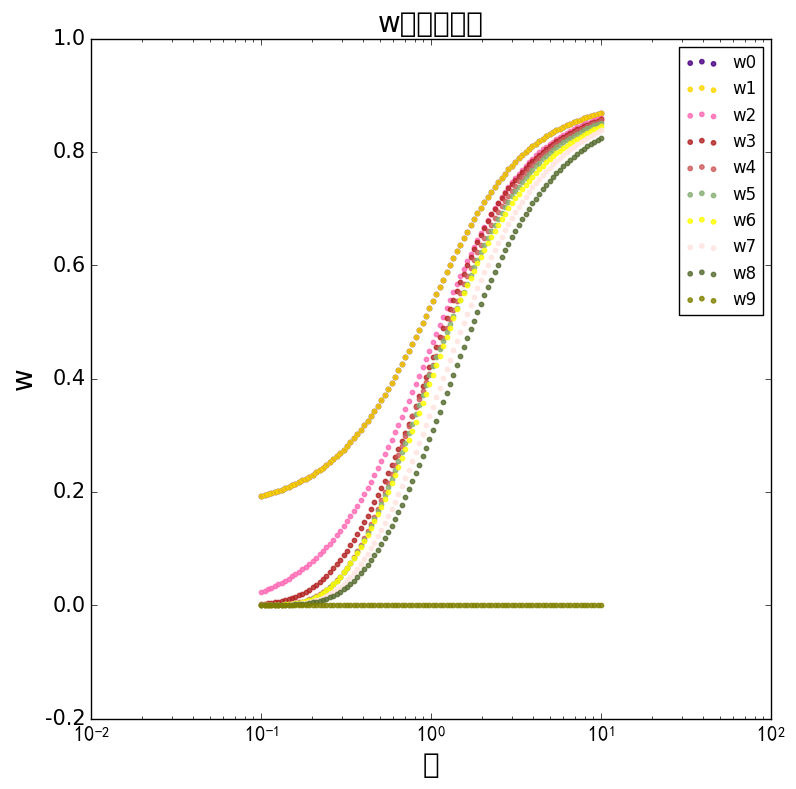

In [17]:

s=[]

for i in range(0,10):
    s.append(plt.scatter(_lambda,mu[:,i],color=colors_[i],alpha=0.8,s=10))
# for temp in lines:
#     plt.plot([temp-0.5,temp-0.5],[0,1])
plt.xscale('log')
# plt.yscale('log')
plt.title(u"w与λ的关系")
plt.xlabel(u"λ")
plt.ylabel("w")
# s.append(plt.scatter(_lambda,np.linalg.norm(np.tile(x.reshape(1,784),(100,1))-resultw.dot(P),axis=1),alpha=1,s=15))
l=['w%d'%temp for temp in range(0,10)]
# l.append(u"残差")
plt.legend(s, l)
plt.savefig(u"w与lambda的关系.png",dpi=500)

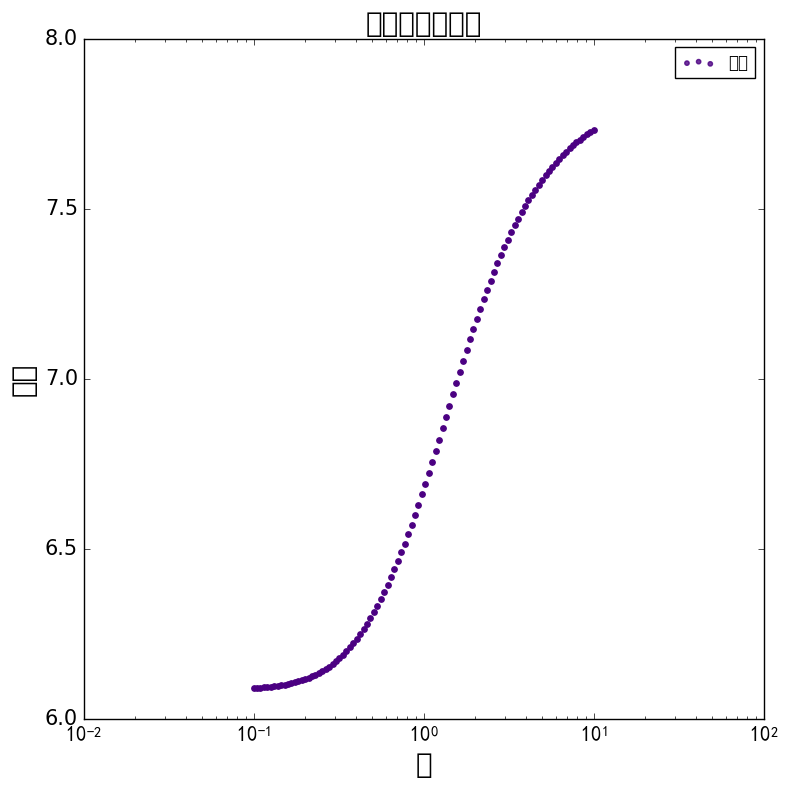

In [18]:
plt.xscale('log')
# plt.yscale('log')
plt.title(u"残差与λ的关系")
plt.xlabel(u"λ")
plt.ylabel(u"残差")
l=[]
s.append(plt.scatter(_lambda,np.linalg.norm(np.tile(x.reshape(1,784),(100,1))-resultw.dot(P),axis=1),color=colors_[0],alpha=1,s=15))
# l=['w%d'%temp for temp in range(0,10)]
l.append(u"残差")
plt.legend(s, l)
plt.savefig(u"残差与lambda的关系.png",dpi=500)

In [194]:
np.linalg.norm(np.tile(x.reshape(1,784),(100,1))-resultw.dot(P),axis=1)
# (resultw.dot(P)).shape
# np.tile(x.reshape(1,784),(10,1)).shape

array([ 1543.90326437,  1543.90431037,  1543.90740084,  1543.91247501,
        1543.91946461,  1543.92831599,  1543.93903706,  1543.95185194,
        1543.96738065,  1543.98669024,  1544.0111414 ,  1544.0422056 ,
        1544.08100575,  1544.12837059,  1544.18468099,  1544.24996371,
        1544.32399587,  1544.40642806,  1544.49680736,  1544.5951299 ,
        1544.70056824,  1544.81317909,  1544.9325546 ,  1545.05882729,
        1545.1916971 ,  1545.33128698,  1545.47765939,  1545.63094926,
        1545.79132301,  1545.95898956,  1546.13418242,  1546.31715835,
        1546.50819177,  1546.70755928,  1546.91554036,  1547.13240949,
        1547.35844264,  1547.59388605,  1547.83932215,  1548.09439591,
        1548.35958131,  1548.63502358,  1548.92088131,  1549.2172842 ,
        1549.52432039,  1549.84206743,  1550.17057728,  1550.50986153,
        1550.85991019,  1551.22071867,  1551.59223066,  1551.97436228,
        1552.36705693,  1552.77019349,  1553.18364964,  1553.60731996,
      

In [142]:
resultw = [tem.variables()[0].value.tolist() for tem in problist]
# resultw = np.array(resultw).reshape(test_size,classes)
# print "样本总数%s, 分类错误数目:"%samples,np.sum(np.abs((resultw.argmax(1)-dataset.target[60000:])!=0))